# Курсовой проект "Regression.Tutors"

## Описание проекта

**Regression.Tutors** - результаты экзамена по математике  
Прогнозирование средних результатов экзаменов по математике для студентов репетиторов

_Разрешается использовать только этот импорт:_

import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt  
import seaborn as sns

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

## Подготовка данных

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Загрузка данных

In [2]:
def df_read_csv(df):
    # train = df_read_csv('train')
    # test = df_read_csv('test')
    if df == 'train':
        TRAIN_DATASET_PATH = 'dataset/train.csv'
        df = pd.read_csv(TRAIN_DATASET_PATH)
        print(f"Train:\t{df.shape[0]}\t string and {df.shape[1]} features")
    elif df == 'test':
        TEST_DATASET_PATH = 'dataset/test.csv'
        df = pd.read_csv(TEST_DATASET_PATH)
        print(f'Test:\t{df.shape[0]}\t string and {df.shape[1]} features')
    else:
        print('Invalid parameter: dataset name!')
    return df

In [3]:
# Загрузка данных
train = df_read_csv('train')

Train:	10000	 string and 12 features


### Просмотр данных

In [4]:
train.head(20)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,62
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [5]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


### Описание признаков

id - id наблюдения  
age - возраст  
years_of_experience - стаж преподавания  
lesson_price - стоимость урока  
qualification - квалификация репетитора  
physics - физика  
chemistry - химия  
biology - биология  
english - английский  
geography - география  
history - история  
mean_exam_points - средний бал за экзамен (целевая переменная)

In [6]:
# Сохраним названия признаков
# feature_names = list(train.columns)
feature_names = train.keys()[1:]
feature_names

Index(['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

### Оптимизация памяти

In [7]:
def optimizing_df(df):
    # train = optimizing_df(train)
    # test = optimizing_df(test)
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])

    return df

In [8]:
# Оптимизируем использование памяти
train = optimizing_df(train)

In [9]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  uint16 
 1   age                  10000 non-null  float32
 2   years_of_experience  10000 non-null  float32
 3   lesson_price         10000 non-null  float32
 4   qualification        10000 non-null  float32
 5   physics              10000 non-null  float32
 6   chemistry            10000 non-null  float32
 7   biology              10000 non-null  float32
 8   english              10000 non-null  float32
 9   geography            10000 non-null  float32
 10  history              10000 non-null  float32
 11  mean_exam_points     10000 non-null  uint8  
dtypes: float32(10), uint16(1), uint8(1)
memory usage: 420.0 KB


## Визуализация данных

### Распределение целевой переменной

Text(0.5, 1.0, 'Distribution of variable mean_exam_points')

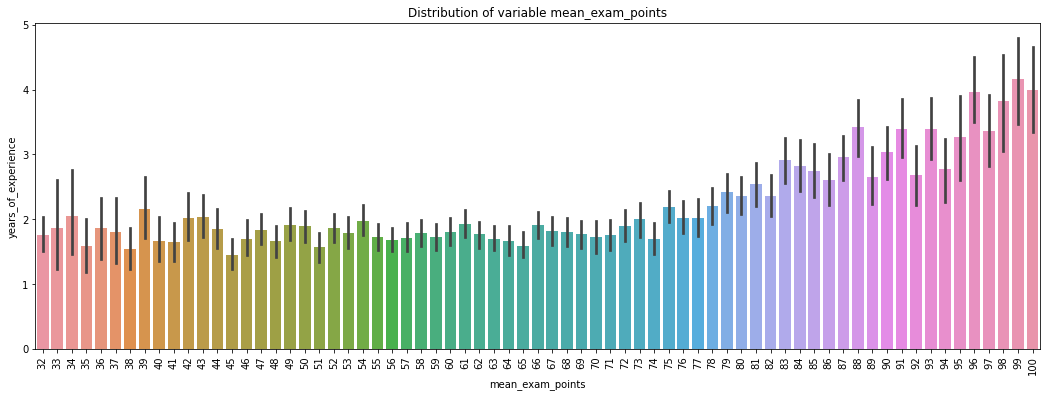

In [10]:
# Распределение целевой переменной в зависимости от стажа преподавания
# Как видим, чем больше стаж, тем выше бал, что неудивительно
plt.figure(figsize=(18, 6))
sns.barplot(data=train, x=train['mean_exam_points'], y=train['years_of_experience'])
plt.xticks(rotation=90)
plt.title('Distribution of variable mean_exam_points')

### Количественное распределение целевой переменной

<Figure size 576x576 with 0 Axes>

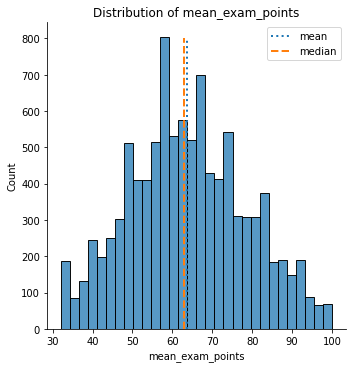

In [11]:
# Посмотрим количественное распределение целевой переменной и средний бал
target_mean = train['mean_exam_points'].mean()
target_median = train['mean_exam_points'].median()

plt.figure(figsize = (8, 8))

sns.displot(train['mean_exam_points'], bins=30)

y = np.linspace(0, 800, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=2)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=2)

plt.title('Distribution of mean_exam_points')
plt.legend()
plt.show()

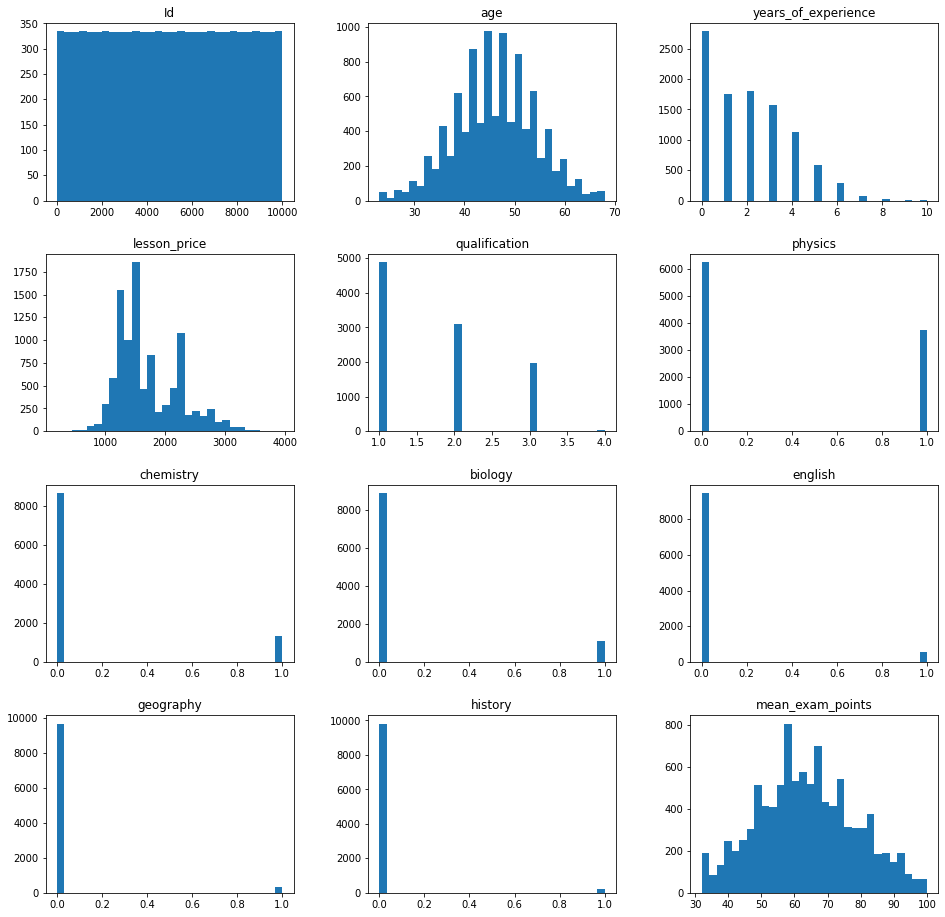

In [12]:
# Изучим остальные данные
train.hist(figsize=(16,16), bins=30, grid=False);

## Модель данных

### Стандартизируем данные

In [13]:
# Стандартизация данных
def normalize_train(train):
    train = scaler.fit_transform(train)
    train = pd.DataFrame(train, columns=feature_names)
    return train

In [14]:
# Стандартизируем данные
normalize_train(train[feature_names])

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,-0.730774,-1.121140,-0.569875,-0.908202,1.290994,-0.391497,-0.350843,-0.238217,5.491143,-0.140655,-0.186150
1,0.263815,1.136037,2.192764,1.616335,1.290994,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,0.833923
2,-0.855098,-1.121140,-0.950929,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.730188
3,0.015167,1.700332,-0.569875,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.662183
4,-0.357803,-0.556846,-0.379348,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.458169
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.233480,-1.121140,0.001705,0.354066,1.290994,2.554301,-0.350843,-0.238217,-0.182111,-0.140655,1.309956
9996,0.636785,-1.121140,0.001705,0.354066,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.390164
9997,-1.476716,-0.556846,-0.855666,-0.908202,1.290994,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.118145
9998,-1.601039,0.571743,-1.141456,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,-0.526174


### Разделяем датасет

In [15]:
# Убираем лишние столбцы и сохраняем целевую переменную
train = np.transpose(train.values)
X = train[1:-1]
y = train[-1]

In [16]:
# Разделяем датасет на тренировочный и валидационный
train_data_regr, test_data_regr, train_target_regr, test_target_regr = train_test_split(
    np.transpose(X), np.transpose(y), test_size=0.30, random_state=1)

### Модель Regression Tree

In [17]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [18]:
class Leaf_clsf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        
    

class Leaf_regr:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [19]:
class BaseTree:

    def __init__(self,
                 max_depth,
                 max_leaf_nodes,
                 min_leaf_samples,
                 leaf_class):
        self.max_depth = max_depth
        self.nodes = []
        self.leaves = []
        self.depth = 0
        self.max_leaves = max_leaf_nodes
        self.min_objects = min_leaf_samples
        self.tree = None
        self.Leaf = leaf_class
        
    # Разбиение датасета в узле
    def split(self,
              data,
              labels,
              column_index,
              t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
    # Расчет прироста
    def gain(self,
             left_labels,
             right_labels,
             root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return root - p * self.criterion(left_labels) - (1 - p) * self.criterion(right_labels)   
    
    # Нахождение наилучшего разбиения
    def find_best_split(self,
                        data,
                        labels):

        #  обозначим минимальное количество объектов в узле
        min_samples_leaf = 5

        root = self.criterion(labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_labels, false_labels, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self,
                   data,
                   labels):

        gain, t, index = self.find_best_split(data, labels)
        
        # Базовые случаи для остановки построения дерева
 
        #  Базовый случай 2 - прекращаем рекурсию, когда достигли максимальной глубины дерева
        if self.depth > self.max_depth:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 3 - прекращаем рекурсию, когда достигли максимального количества листьев
        if len(self.leaves) >= self.max_leaves - 1 or self.depth >= self.max_leaves - 1:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 4 - прекращаем рекурсию, когда достигли минимального количества объектов в листе
        if len(data) <= self.min_objects:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
         #  Базовый случай 1 - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)

        self.depth += 1
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        self.nodes.append(Node(index, t, true_branch, false_branch))
        return Node(index, t, true_branch, false_branch)
    
    def predict_object(self,
                       obj,
                       node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, self.Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels)
        return self
    
    def predict(self, data):
    
        classes = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            classes.append(prediction)
        return classes

In [20]:
class Classification_Tree(BaseTree):
    def __init__(self,
                 max_depth=np.inf,
                 max_leaf_nodes=np.inf,
                 min_leaf_samples=1,
                 leaf_class=Leaf_clsf):
        super().__init__(max_depth=max_depth,
                         max_leaf_nodes=max_leaf_nodes,
                         min_leaf_samples=min_leaf_samples,
                         leaf_class=Leaf_clsf)

    # Расчет критерия Джини
    def criterion(self,
                  labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2

        return impurity

In [21]:
class Regression_Tree(BaseTree):
    def __init__(self,
                 max_depth=np.inf,
                 max_leaf_nodes=np.inf,
                 min_leaf_samples=1,
                 leaf_class=Leaf_regr):
        super().__init__(max_depth=max_depth,
                         max_leaf_nodes=max_leaf_nodes,
                         min_leaf_samples=min_leaf_samples,
                         leaf_class=Leaf_regr)

    # Расчет дисперсии
    def criterion(self, targets):
        return np.mean((targets - targets.mean())**2)

In [22]:
regr = Regression_Tree(max_depth=1000)
regr.fit(train_data_regr, train_target_regr)

r2_score(train_target_regr, regr.predict(train_data_regr)), r2_score(test_target_regr, regr.predict(test_data_regr))

(0.7591789511735626, 0.5563172402189076)

## Прогноз целевой переменной (test)

In [23]:
# Загрузка и предобработка тестовых данных
test = df_read_csv('test')
df_save = test

Test:	10000	 string and 11 features


In [24]:
# Оптимизируем использование памяти
test = optimizing_df(test)

In [25]:
test = np.transpose(test.values)
ids, test = test[0], test[1:]  # id для предсказания нам не нужен
test = np.transpose(test)

In [26]:
regr = Regression_Tree(max_depth=500)
regr.fit(test_data_regr, test_target_regr)

r2_score(test_target_regr, regr.predict(test_data_regr))

0.76034287632327

In [27]:
test_pred = regr.predict(test)

In [28]:
pd.concat([df_save['Id'], pd.Series(test_pred)], axis=1)

,Id,0
0,10000,55.400002
1,10001,68.199997
2,10002,45.333332
3,10003,81.400002
4,10004,91.285713
...,...,...
9995,19995,43.333332
9996,19996,81.125000
9997,19997,58.200001
9998,19998,68.400002


In [29]:
df_final = pd.concat([df_save['Id'], pd.Series(test_pred)], axis=1)
df_final = df_final.rename(columns={0: 'mean_exam_points'})

In [30]:
df_final.to_csv('VSmirnov_predictions.csv', index=None)